## MATH 157 Final Presentation
**Topic: Differential equations and modeling of endemic diseases, Part 1, SageMath**
<br> **By: Zhaoyang Jia**

*Disclaimer: This presentation models disease spread and control strategies base on theoretical approaches, but in the real world, the problem is more complex. Please follow your local guidelines on disease controls*

### Overview (with respective target time) ###
- Differential Equations in SageMath (7 min)
- Background on SIR model (10 min)
- Solving the SIR model in SageMath (10 min)
- Differential Equations in Julia (7 min)
- Modifying the SIR parameters to simulate safety measurements (15 min)

### desolve() in SageMath ###

- We will first demonstrate how ODE is solved in SageMath
- desolve() has a relatively simpler syntax compared to the Julia DifferentialEquations package, but desolve() has a few limitations, and the plot is a bit uglier.

We can easily setup the symbolic equation using diff(dependent_var, independent_var); desolve() solves n-th order differential equation symbolically.

e^(2*x) + 1


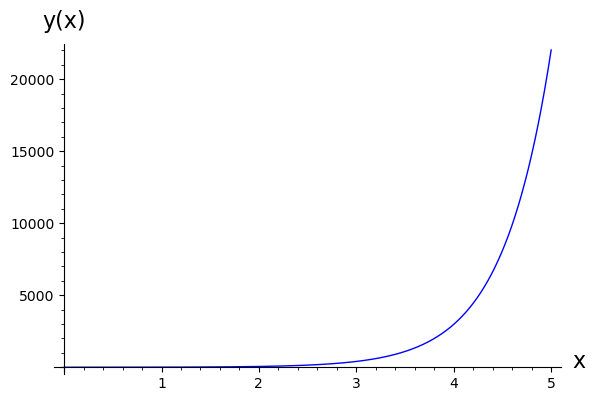

In [15]:
x = var('x')                      # set up independent variable
y = function('y')(x)              # set up function with dependent variable y, and independent variable x
de = diff(y,x) == 2*y - 2         # dy/dx = 2y - 2
soln = desolve(de, y, ics=[0,2])  # y(0) == 2
print(soln)                       # symbolic solution
plot(soln, (x,0,5), ymin=0, axes_labels = ["x", "y(x)"])

desolve_rk4() is used for solving differential equation numerically using the Runge-Kutta method. Note, this is exclusive to only 1st order DE.
- The Runge-Kutta method is similar to the Euler's method in approximating the numerical values of an ODE, but it requires more calculations, result in better accuracy.

<img src="rk4.png" width="350">

- Basic concept
    - using a very small step size, calculate 4 slopes near the point to be evaluated: one slope at the start, two slopes in the middle, and one slope at the end; hence, this is where the "4" of rk4 comes from
    - using a weighted calculation, we factor in these four slopes and approximate the numerical value of the point after the step size, using the numerical value of the point before the step size
    - given an initial condition, we can iteratively approximate upstream and downstream via a small step size

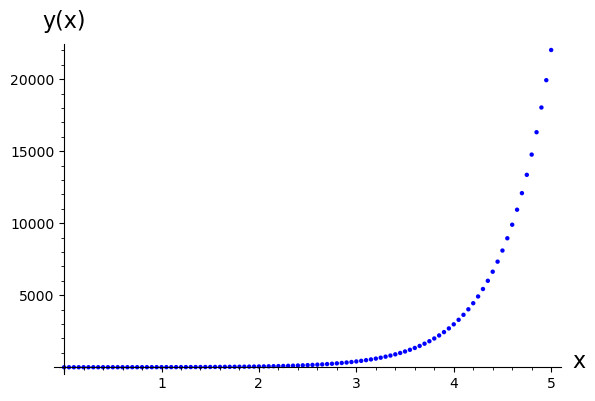

In [16]:
soln_num = desolve_rk4(de, y, ics=[0,2], end_points=5, step=0.05)
points(soln_num, axes_labels=["x", "y(x)"])
#print(soln_num)     # the output is an array of (x,y) points

Next, we will solve a 2nd order differential equation. Since we all took MATH 20D, a famous example is the spring dampener system.
- a mass is attached to a spring, going back and forth horizontally
- the force exerted by the spring is proportional to the distance of the block from the spring
- the dampener/friction's force is proportional to the velocity the block is moving at
- the overall acceleration the block feels is proportional to the mass of the block, by Newton's second law of motion.
<br><img src="spring_dampener.png" width="450">
<br></brThis>This system can be modeled by a second order differential equation


$$-kx - Bv = ma$$
or equivalently
$$-kx - B\frac{dx}{dt} = m \frac{d^2x}{dt^2} $$

This 2nd order differential equation can be easily solved symbolically via SageMath, without much difference in syntax.

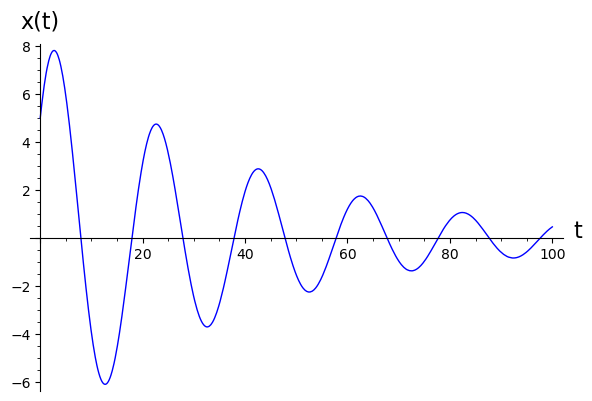

In [17]:
k = 1    # spring constant
B = 0.5  # dampening constant
m = 10   # mass of the object
t = var('t')
x = function('x')(t)
diff_eq = -k*x - B * diff(x,t) == m * diff(x,t,2)
soln = desolve(diff_eq, x, ics=[0,5,2]) # x(0) = 5, x'(0) = 2
plot(soln, (t,0,100), xmin=0, axes_labels = ["t", "x(t)"])

We can use desolve_system() to symbolically solve a system of differential equations, and this comes in handy for our disease model. 
- Note: the output needs to be extracted using the .rhs() method.

[x(t) == e^(-t), y(t) == 2*e^(-3*t)]
equation 1:  e^(-t)
equation 2:  2*e^(-3*t)


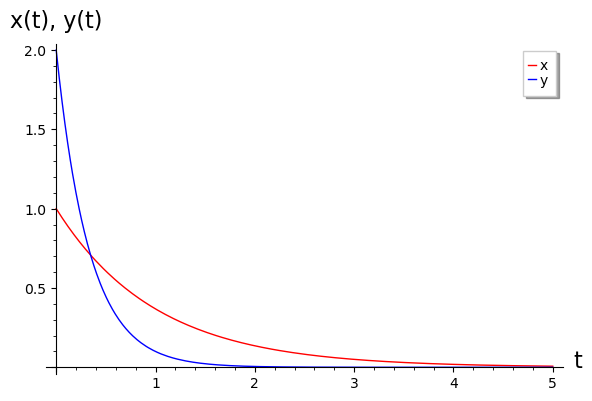

In [18]:
t = var('t')
x = function('x')(t)
y = function('y')(t)
de1 = diff(x,t) + x == 0
de2 = diff(y,t) + 3*y == 0
soln = desolve_system([de1, de2], [x,y], ics=[0,1,2])  # x(0) = 1, y(0) = 2
print(soln)
print("equation 1: ", soln[0].rhs())
print("equation 2: ", soln[1].rhs())
p = plot(soln[0].rhs(), (t,0,5), color="red", axes_labels=["t", "x(t), y(t)"], legend_label='x') + plot(soln[1].rhs(), (t,0,5), color="blue",legend_label='y')
p.set_legend_options(loc=1)   # sets the legend's position
p

desolve_system_rk4() can be used to numerically solve a system of 1st order differential equations. 
- the equation input syntax is very different from all previous cases: We no longer initialize the equations by themselves, rather, we only specify the right-hand-side of the equations, while assuming the left-hand-side only has the 1st order derivative.

In [19]:
var('t','x','y')
t = var('t')
de1 = -x    # dx/dt = -x
de2 = -3*y  # dy/dt = -3y
soln = desolve_system_rk4([de1, de2], vars=[x,y], ics=[0,1,2], ivar=t, end_points=5, step=0.05)

In [20]:
soln  # solution presented as (independent_var, dependent_var_1, dependent_var_2)

[[0, 1, 2],
 [0.05, 0.9512294270833334, 1.7214171875],
 [0.1, 0.9048374229492866, 1.481638566710205],
 [0.15, 0.8607079834356096, 1.275259047198906],
 [0.2, 0.8187307619695061, 1.097626421181535],
 [0.25, 0.7788007936437542, 0.9447364934380046],
 [0.3, 0.7408182327497936, 0.813142818731331],
 [0.35, 0.7046881031114737, 0.6998790120281551],
 [0.4, 0.670320060595168, 0.6023918802378927],
 [0.45, 0.637628167202407, 0.518483868125975],
 [0.5, 0.6065306761801414, 0.4462635210167684],
 [0.55, 0.5769498276113028, 0.3841028476162663],
 [0.6000000000000001, 0.5488116539745275, 0.3306006218271671],
 [0.65, 0.5220457951868464, 0.2845507963057365],
 [0.7000000000000001, 0.496585322666847, 0.2449153157387532],
 [0.75, 0.4723665719783771, 0.2108007169973395],
 [0.8, 0.4493289836363098, 0.1814379886882718],
 [0.8500000000000001, 0.4274149516763034, 0.1561652360967108],
 [0.9, 0.4065696796099008, 0.1344127607534367],
 [0.9500000000000001, 0.3867410434047803, 0.1156902182901457],
 [1.0, 0.3678794611475

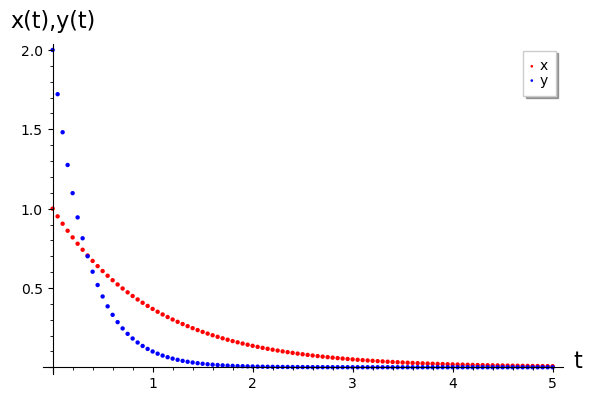

In [21]:
# extract each pair of variables: x(t) and y(t)
S_values = [(t,x) for (t,x,_) in soln]
I_values = [(t,y) for (t,_,y) in soln]

list_plot(S_values,color="red",axes_labels=["t", "x(t),y(t)"],legend_label='x') + list_plot(I_values, color="blue", legend_label ='y')

Lastly, we will see that the SageMath desolve() has some significant limitation, especially in the symbolic solve. We set up a system where the $\frac{dx}{dt}$ depends on $y$, and the $\frac{dy}{dt}$ depends on $x$.

In [22]:
t = var('t')
x = function('x')(t)
y = function('y')(t)
de1 = diff(x,t) - y^2 == 0
de2 = diff(y,t) - x^2 == 0
soln = desolve_system([de1, de2], [x,y], ics=[0,1,2])  # x(0) = 1, y(0) = 2
print(soln)

[x(t) == ilt((laplace(y(t)^2, t, g2266) + 1)/g2266, g2266, t), y(t) == ilt((laplace(x(t)^2, t, g2266) + 2)/g2266, g2266, t)]


We see that the output includes unknown variables such as ilt() and g2669. These are the intermediate output for the Maxima DE solver, which is used behind the desolve() function. When the problem gets too complicated, the desolve() can no longer extract the solution from Maxima, and the raw output is given. This raw output has little value to us. However, the numerical solve is sufficient for our disease modeling, so we will not use the symbolic solve for this reason.

### Background

The formal definition of differential equations is the following (from wikipedia):
<center> "An equation that relates one or more unknown functions and their derivatives"

This is very useful in disease modeling, because our usual goal is to find a way to reduce the new_patient/day or new_recovered/day. They are naturally in the derivative form.
<img src="COVID_chart.png" width="900">

A set of Ordinary Differential Equations is very handy to model the system
- eg. the new patient per day depends on both the number of currently-sick (they spread the disease), and the currently-susceptible (they receive the disease); the more we have in each category, the more newly-sick we will get everyday

### SIR Model (Compartmental Model)

We separate the whole population into three compartments:
- S: susceptible to the disease
- I: ill at the moment, and can spread the disease
- R: recovered, and cannot again get the disease or spread it (a sadder but more accurate terminology calls this "removed" to include the ones that died due to the disease)

We have the following set of equations:
- $ \frac{dS}{dt} = -\textrm { the rate people turns ill} = -\alpha SI$
- $ \frac{dI}{dt} = \textrm { the rate people turns ill} - \textrm { the rate people recover} = \alpha SI - \beta I$
- $ \frac{dR}{dt} = \textrm { the rate people recover} = \beta I$

Explanation
- we have two constants
    - $\alpha$: a measure of how contagious the disease is
    - $\beta$: a measure of how easily recoverable (and lethal) the disease is
- the rate people turns ill is modeled by the number of spreader in the population ($I$), and the number of receiver in the population ($S$), where each spreader spread with $\alpha$ level of contagiousness to all the susceptible population
- the rate people recover is modeled by the recoverable/lethal constant, on each individual who are ill
- once a person leaves one compartment, they enter the next compartment, and we assume unidirectional: S -> I -> R, and the once who received the disease cannot get it again

In summary,
- $\frac{dS}{dt} = -\alpha SI$
- $\frac{dI}{dt} = \alpha SI - \beta I$
- $\frac{dR}{dt} = \beta I$

### Solving the SIR model ###

<img src="10_23_data.png" width="500">

*(data from Google COVID-19 statistics)*
Let's take an estimate on the parameters from the second peak of the initial COVID outbreak (October 23rd, 2020). We will use California as our population.
- We assume that patients on average, remain contagious for 14 days during their illness. Thus we have $$b = 1/14$$ 
- We then calculate the total patients on a g from the 7-day average and the 7-day average from seven days ago (since we assume of a 14 days period; not entirely accurate but good enough).
$$\frac{dS}{dt}(\textrm {a given day}) = -\alpha * S * I  $$ $$ = -\alpha * (\textrm {new sicks that day}) * (7 * \textrm{7-day-average} + 7 * \textrm{previous 7-day-average}) * (\textrm {total population})$$
We get $$\alpha = \frac {5901}{(4032*7 + 3268*7)(40000000)} $$

First of all, we see that the symbolic solve does not work, with the problem we described beforehand.

In [23]:
a = 0.1
b = 0.1
t_0 = 0
S_0 = 1000
I_0 = 5
R_0 = 0

S = function('S')(t)
I = function('I')(t)
R = function('R')(t)

de1 = diff(S,t) == -a*S*I
de2 = diff(I,t) == a*S*I - b*I
de3 = diff(R,t) == b*I
desolve_system([de1,de2,de3],[S,I,R],ics=[t_0,S_0,I_0,R_0], ivar=t)

[S(t) == ilt(-1/10*(laplace(S(t)*_I(t), t, g2378) - 10000)/g2378, g2378, t),
 _I(t) == ilt((laplace(S(t)*_I(t), t, g2378) + 50)/(10*g2378 + 1), g2378, t),
 R(t) == ilt(1/10*(laplace(S(t)*_I(t), t, g2378) + 50)/(10*g2378^2 + g2378), g2378, t)]

We will try the numerical solve

In [24]:
S_0 = 40000000
I_0 = 3000
R_0 = 0
t_0 = 0

a = 5901/((4032*7 + 3268*7)*S_0)
b = 1/14

var('S','I','R','t')

de1 = -a*S*I
de2 = a*S*I - b*I
de3 = b*I
soln = desolve_system_rk4([de1,de2,de3],[S,I,R],ics=[t_0,S_0,I_0,R_0], ivar=t, end_points=365.0, step=0.25)

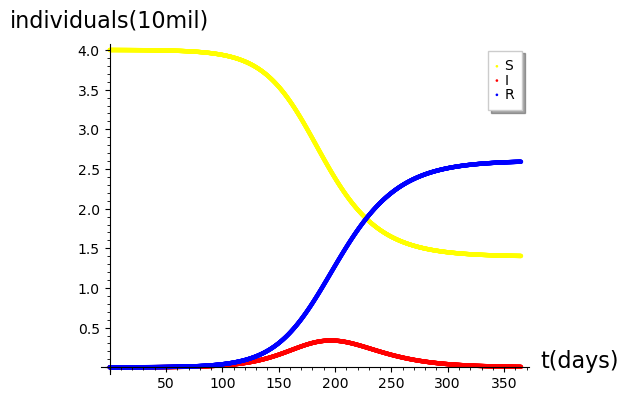

In [25]:
S_values = [(x,y) for (x,y,_,_) in soln]
I_values = [(x,y) for (x,_,y,_) in soln]
R_values = [(x,y) for (x,_,_,y) in soln]

list_plot(S_values,color="yellow",axes_labels=["t(days)", "individuals(10mil)"],legend_label='S') + list_plot(I_values, color="red", legend_label ='I') + list_plot(R_values, color="blue", legend_label = 'R')

The curves look very reasonable
- the growth of the dI/dt is exponential, a characteristic of endemic diseases
- the growth of dI/dt slowed when the total available Susceptible people run low
- the disease is controlled at the end by most people have had gotten the disease, so the disease becomes hardly spreadable in a population where most people are immune

This models a free-spreading disease very reasonably. However, we typically do not let a disease free spread like this. We do not end up with a growth of 5 million cases per day in California. We will talk about this discrepancy later.

### $R_0$, a term in epidemiology ###
In epidemiology, the relationship between $\alpha, \beta$ is called $R_0$, a measure of on average, how many people will get sick from one sick patient.
$$R_0 = \frac {\alpha S}{\beta}$$
By HWO, the $R_0$ of COVID-19 is between 1.4 and 2.4. 
<br> sidetracking: We will find our $R_0$ estimated earlier, based on the data from October 23rd, 2020

In [26]:
numerical_approx(a * 40000000/b)

1.61671232876712

Surprisingly, that was pretty close! (I did not do it backward...)
<br> For COVID omicron variant, people have estimated that without any precaution, can have an $R_0$ as high as 10. Let's keep our $\beta$ the same and calculate the theoretical $\alpha$ with $R_0 = 10$
$$\alpha = \frac{R_0 * \beta}{S}$$

In [27]:
S_0 = 40000000
I_0 = 3000
R_0 = 0      # this is the initial recovered people, not the constant R_0
t_0 = 0

b = 1/14
a = 10 * b / S_0

var('S','I','R','t')

de1 = -a*S*I
de2 = a*S*I - b*I
de3 = b*I
soln = desolve_system_rk4([de1,de2,de3],[S,I,R],ics=[t_0,S_0,I_0,R_0], ivar=t, end_points=365.0, step=0.25)

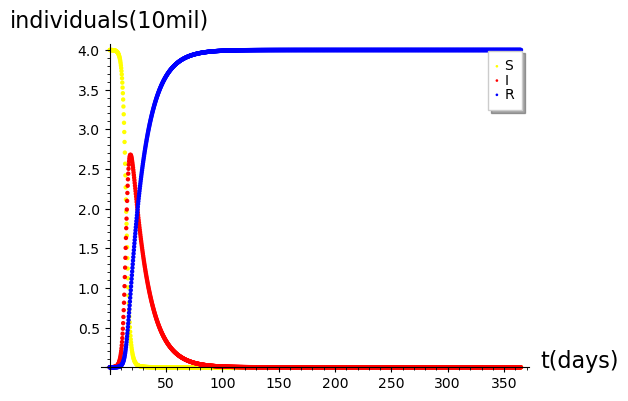

In [28]:
S_values = [(x,y) for (x,y,_,_) in soln]
I_values = [(x,y) for (x,_,y,_) in soln]
R_values = [(x,y) for (x,_,_,y) in soln]

list_plot(S_values,color="yellow",axes_labels=["t(days)", "individuals(10mil)"],legend_label='S') + list_plot(I_values, color="red", legend_label ='I') + list_plot(R_values, color="blue", legend_label = 'R')

Okay, that is obviously not what happened. We have never gotten 25 million new cases in a day in California. Nor is the previous prediction true, as we never met 5 million new cases in a day in California either. Besides the over-simplification of the model, the difference is that we actually took precaution. In Julia, let's see how will some of the measures we take impact the model.